In [2]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules

In [3]:
# Sample transaction dataset
toy_dataset = [['Skirt', 'Sneakers', 'Scarf', 'Pants', 'Hat'],

        ['Sunglasses', 'Skirt', 'Sneakers', 'Pants', 'Hat'],

        ['Dress', 'Sandals', 'Scarf', 'Pants', 'Heels'],

        ['Dress', 'Necklace', 'Earrings', 'Scarf', 'Hat', 'Heels', 'Hat'],

      ['Earrings', 'Skirt', 'Skirt', 'Scarf', 'Shirt', 'Pants']]

df = pd.DataFrame(toy_dataset)
df

,0,1,2,3,4,5,6
0,Skirt,Sneakers,Scarf,Pants,Hat,None,None
1,Sunglasses,Skirt,Sneakers,Pants,Hat,None,None
2,Dress,Sandals,Scarf,Pants,Heels,None,None
3,Dress,Necklace,Earrings,Scarf,Hat,Heels,Hat
4,Earrings,Skirt,Skirt,Scarf,Shirt,Pants,None


In [8]:
import pandas as pd

# Assuming your DataFrame is df
item = df.apply(lambda x: [', '.join(x.dropna().astype(str))], axis=1)

# Display the items
print(item)


0                 [Skirt, Sneakers, Scarf, Pants, Hat]
1            [Sunglasses, Skirt, Sneakers, Pants, Hat]
2                [Dress, Sandals, Scarf, Pants, Heels]
3    [Dress, Necklace, Earrings, Scarf, Hat, Heels,...
4        [Earrings, Skirt, Skirt, Scarf, Shirt, Pants]
dtype: object


In [9]:
# Use TransactionEncoder to convert the list of transactions into a one-hot encoded DataFrame
from mlxtend.preprocessing import TransactionEncoder
te = TransactionEncoder()
te_data = te.fit(item).transform(item)

# Display the output
te_data

array([[False, False, False,  True, False],
       [False, False, False, False,  True],
       [False,  True, False, False, False],
       [ True, False, False, False, False],
       [False, False,  True, False, False]])

In [12]:
# Assuming te_data is your transactional data
te_data = [
    ['Dress', 'Necklace', 'Earrings', 'Scarf', 'Hat', 'Heels', 'Hat'],
    ['Dress', 'Sandals', 'Scarf', 'Pants', 'Heels'],
    ['Earrings', 'Skirt', 'Skirt', 'Scarf', 'Shirt', 'Pants'],
    ['Skirt', 'Sneakers', 'Scarf', 'Pants', 'Hat'],
    ['Sunglasses', 'Skirt', 'Sneakers', 'Pants', 'Hat']
]

# Get unique items
items = set()
for transaction in te_data:
    for item in transaction:
        items.add(item)

# Create a DataFrame with one-hot encoding
onehot_df = pd.DataFrame(index=range(len(te_data)), columns=sorted(items))

# Populate the DataFrame
for i, transaction in enumerate(te_data):
    for item in transaction:
        onehot_df.loc[i, item] = True

# Replace NaN with False
onehot_df.fillna(False, inplace=True)

onehot_df

,Dress,Earrings,Hat,Heels,Necklace,Pants,Sandals,Scarf,Shirt,Skirt,Sneakers,Sunglasses
0,True,True,True,True,True,False,False,True,False,False,False,False
1,True,False,False,True,False,True,True,True,False,False,False,False
2,False,True,False,False,False,True,False,True,True,True,False,False
3,False,False,True,False,False,True,False,True,False,True,True,False
4,False,False,True,False,False,True,False,False,False,True,True,True


In [13]:
# We'll set a `min_support` value to control the threshold of how frequent an itemset must be to be considered.

frequent_itemsets = apriori(onehot_df, min_support=0.2, use_colnames=True)
# 'min_support=0.2' means that we are only interested in itemsets that appear in at least 20% of the transactions.

frequent_itemsets

,support,itemsets
0,0.4,(Dress)
1,0.4,(Earrings)
2,0.6,(Hat)
3,0.4,(Heels)
4,0.2,(Necklace)
...,...,...
146,0.2,"(Earrings, Scarf, Heels, Necklace, Hat)"
147,0.2,"(Skirt, Pants, Earrings, Scarf, Shirt)"
148,0.2,"(Skirt, Pants, Sneakers, Scarf, Hat)"
149,0.2,"(Sunglasses, Skirt, Pants, Sneakers, Hat)"


In [14]:
# Generate Association Rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
# We use 'lift' as the metric to determine how much more likely two items are to be purchased together compared to random chance.
# We use 'min_threshold' to filter the rules to only include those with a lift greater than 1.

rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Earrings),(Dress),0.4,0.4,0.2,0.500000,1.250000,0.04,1.200000,0.333333
1,(Dress),(Earrings),0.4,0.4,0.2,0.500000,1.250000,0.04,1.200000,0.333333
2,(Heels),(Dress),0.4,0.4,0.4,1.000000,2.500000,0.24,inf,1.000000
3,(Dress),(Heels),0.4,0.4,0.4,1.000000,2.500000,0.24,inf,1.000000
4,(Necklace),(Dress),0.2,0.4,0.2,1.000000,2.500000,0.12,inf,0.750000
...,...,...,...,...,...,...,...,...,...,...
1135,(Earrings),"(Dress, Scarf, Heels, Necklace, Hat)",0.4,0.2,0.2,0.500000,2.500000,0.12,1.600000,1.000000
1136,(Scarf),"(Dress, Earrings, Heels, Necklace, Hat)",0.8,0.2,0.2,0.250000,1.250000,0.04,1.066667,1.000000
1137,(Heels),"(Dress, Earrings, Scarf, Necklace, Hat)",0.4,0.2,0.2,0.500000,2.500000,0.12,1.600000,1.000000
1138,(Necklace),"(Dress, Earrings, Scarf, Heels, Hat)",0.2,0.2,0.2,1.000000,5.000000,0.16,inf,1.000000


C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


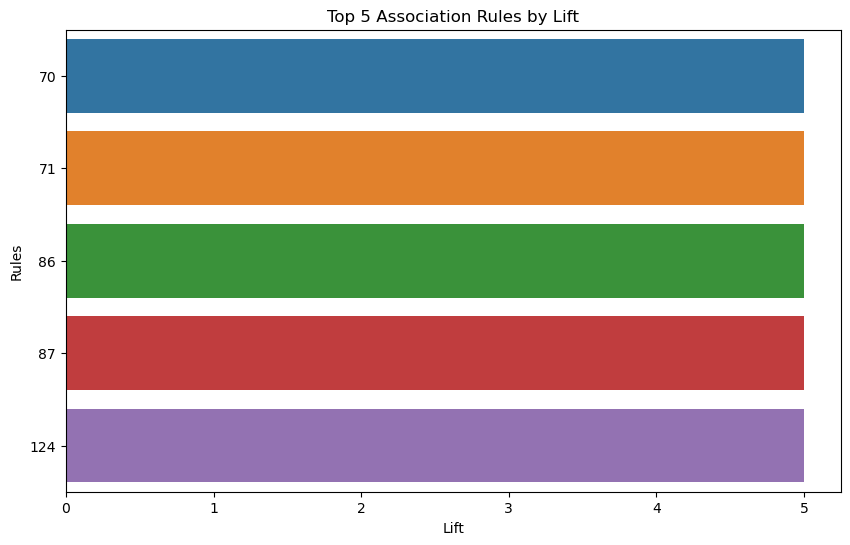

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sort the rules by lift and select the top 5
top_rules = rules.nlargest(5, 'lift')

# Plot a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='lift', y=top_rules.index.astype(str), data=top_rules)
plt.title('Top 5 Association Rules by Lift')
plt.xlabel('Lift')
plt.ylabel('Rules')
plt.show()

**The results of the association rule mining show that there are a number of strong associations between different items sold in the supermarket. For example, the rule "If a customer buys earrings, then they are likely to also buy a dress" has a lift of 1.25, meaning that customers who buy earrings are 1.25 times more likely to also buy a dress than the average customer.***

-This information can be used to develop a number of business plans for the supermarket owners. For example, they could:

-Place earrings and dresses close together in the store, so that customers are more likely to see and buy both items.
-Offer discounts or promotions on earrings and dresses when they are purchased together.
-Create marketing campaigns that target customers who are likely to buy both earrings and dresses.